# Цель лабораторной работы

Изучение основных методов анализа и прогнозирование временных рядов.

# Задание

1. Выберите набор данных (датасет) для решения задачи прогнозирования временного ряда.
2. Визуализируйте временной ряд и его основные характеристики.
3. Разделите временной ряд на обучающую и тестовую выборку.
4. Произведите прогнозирование временного ряда с использованием как минимум двух методов.
5. Визуализируйте тестовую выборку и каждый из прогнозов.
6. Оцените качество прогноза в каждом случае с помощью метрик.

# Ход выполнения работы

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, LeaveOneOut, GridSearchCV, learning_curve, validation_curve
from sklearn.metrics import accuracy_score, f1_score
from sklearn import metrics
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [2]:
# Параметр squeeze=True загружает набор данных в виде объекта Series
dataset = pd.read_csv('Electric_Production.csv', header=0, index_col=0, parse_dates=True)

In [3]:
# Первые 5 строк датасета
dataset.head()

,Value
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


In [4]:
dataset.dtypes

Value    float64
dtype: object

In [5]:
# Основные статистические характеристки набора данных
dataset.describe()

,Value
count,397.000000
mean,88.847218
std,15.387834
min,55.315100
25%,77.105200
50%,89.779500
75%,100.524400
max,129.404800


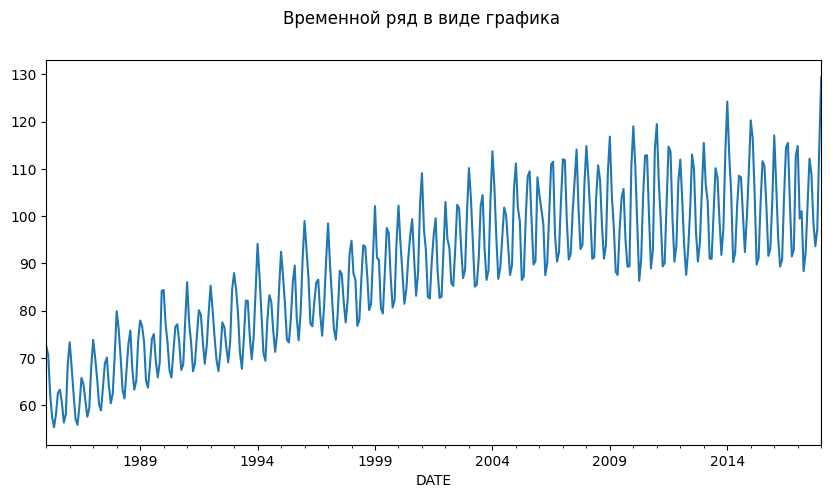

In [6]:
fig, ax = pyplot.subplots(1, 1, sharex='col', sharey='row', figsize=(10,5))
fig.suptitle('Временной ряд в виде графика')
dataset.plot(ax=ax, legend=False)
pyplot.show()

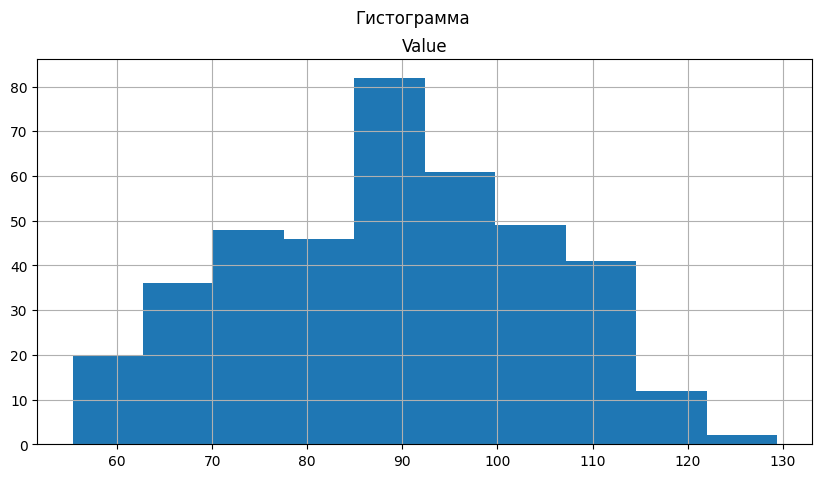

In [7]:
fig, ax = pyplot.subplots(1, 1, sharex='col', sharey='row', figsize=(10,5))
fig.suptitle('Гистограмма')
dataset.hist(ax=ax, legend=False)
pyplot.show()

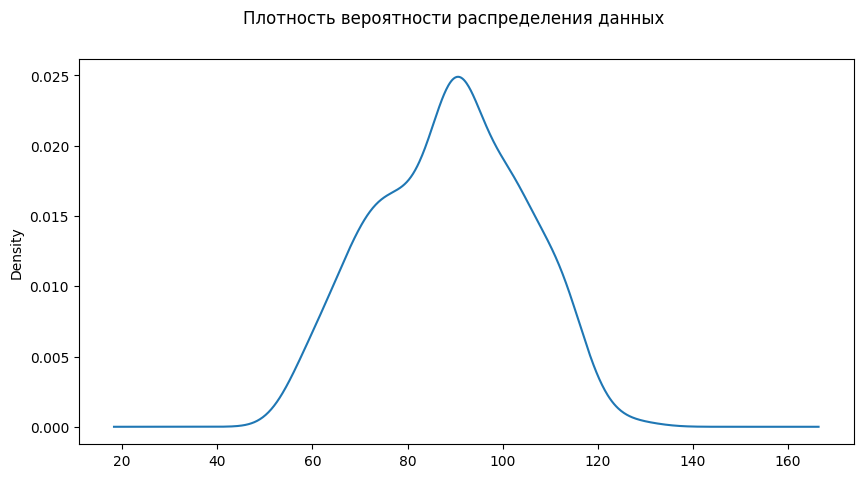

In [8]:
fig, ax = pyplot.subplots(1, 1, sharex='col', sharey='row', figsize=(10,5))
fig.suptitle('Плотность вероятности распределения данных')
dataset.plot(ax=ax, kind='kde', legend=False)
pyplot.show()

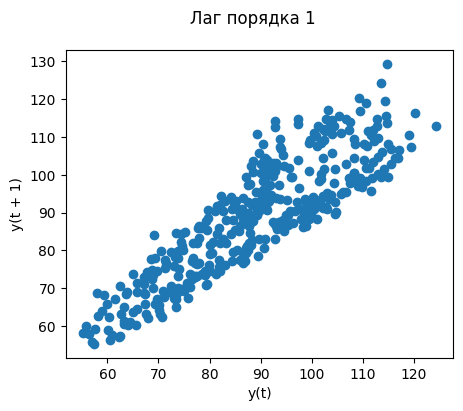

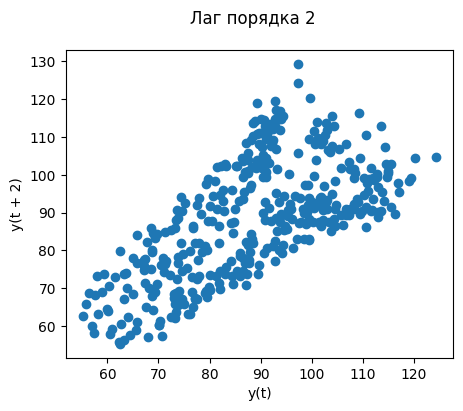

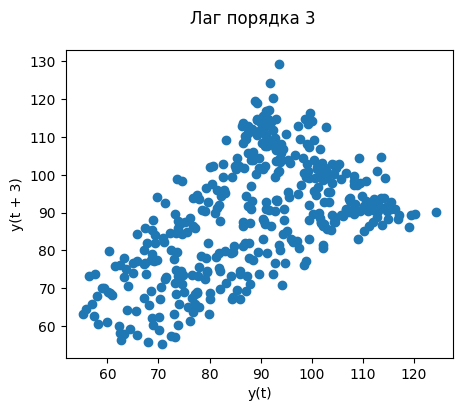

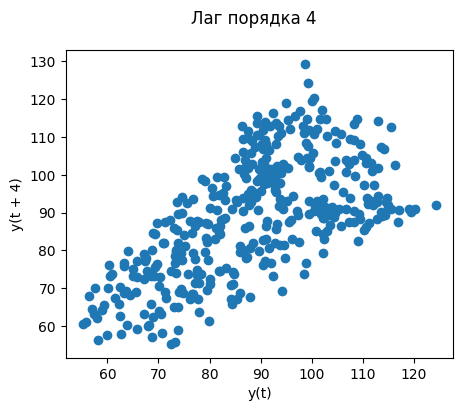

In [9]:
for i in range(1, 5):
    fig, ax = pyplot.subplots(1, 1, sharex='col', sharey='row', figsize=(5,4))
    fig.suptitle(f'Лаг порядка {i}')
    pd.plotting.lag_plot(dataset, lag=i, ax=ax)
    pyplot.show()

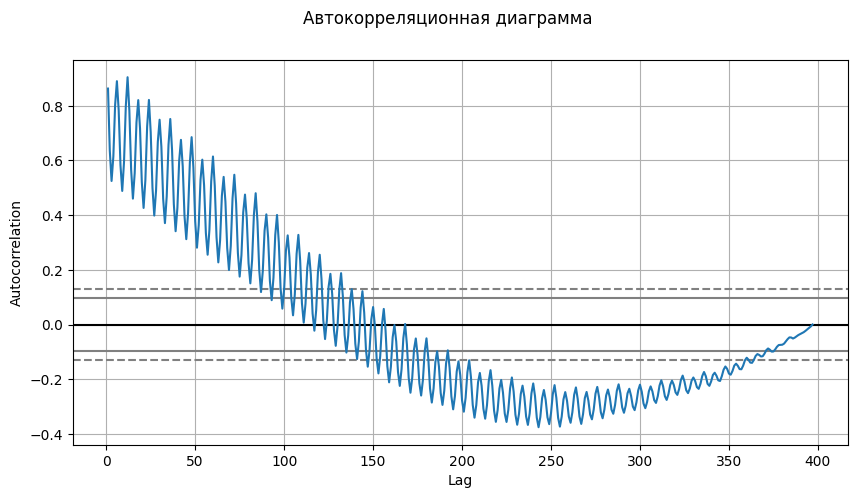

In [10]:
# По оси Y откладывается ковариация 
fig, ax = pyplot.subplots(1, 1, sharex='col', sharey='row', figsize=(10,5))
fig.suptitle('Автокорреляционная диаграмма')
pd.plotting.autocorrelation_plot(dataset, ax=ax)
pyplot.show()

In [11]:
# Аддитивная модель
def plot_decompose(data=dataset['Value'], model='add'):
    result_add = seasonal_decompose(data, model = 'add', period=12)
    fig = result_add.plot()
    fig.set_size_inches((10, 8))
    # Перерисовка
    fig.tight_layout()
    plt.show()

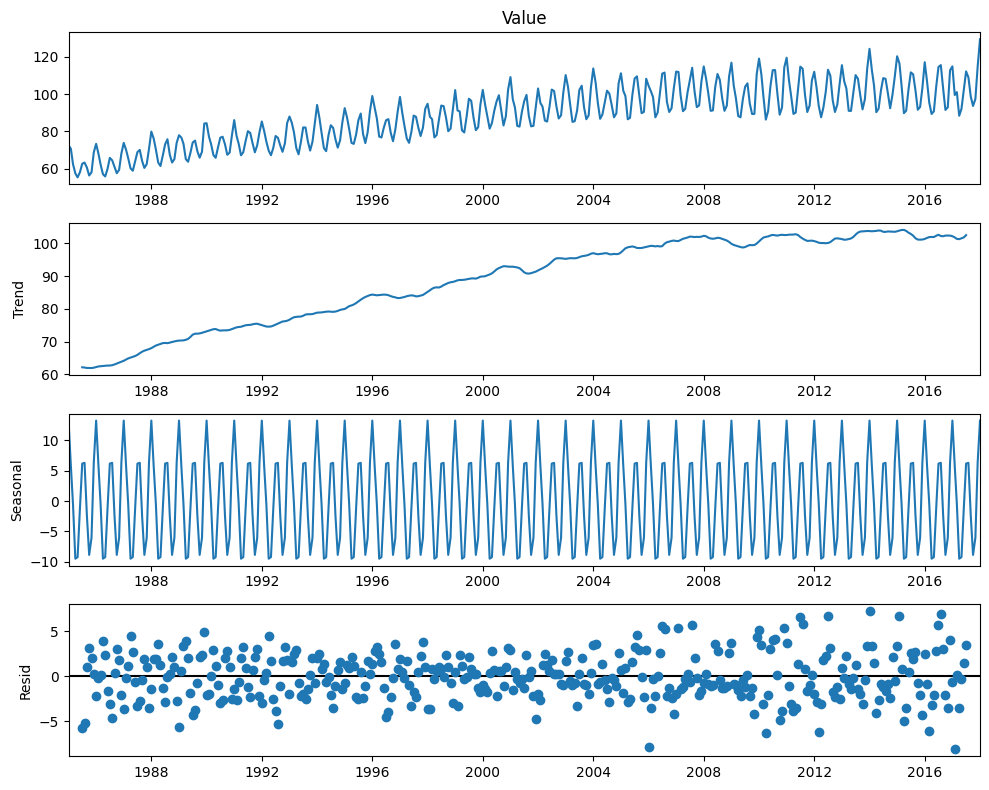

In [12]:
plot_decompose(data=dataset['Value'], model='add')

In [13]:
# Целочисленная метка шкалы времени 
xnum = list(range(dataset.shape[0]))
# Разделение выборки на обучающую и тестовую
Y = dataset['Value'].values
train_size = 24
xnum_train, xnum_test = xnum[0:train_size], xnum[train_size:]
train, test = Y[0:train_size], Y[train_size:]
history_arima = [x for x in train]
history_es = [x for x in train]

In [14]:
# Параметры модели (p,d,q) 
arima_order = (6,1,0)
# Формирование предсказаний
predictions_arima = list()
for t in range(len(test)):
    model_arima = ARIMA(history_arima, order=arima_order)
    model_arima_fit = model_arima.fit()
    yhat_arima = model_arima_fit.forecast()[0]
    predictions_arima.append(yhat_arima)
    history_arima.append(test[t])
# Вычисление метрики RMSE
error_arima = mean_squared_error(test, predictions_arima, squared=False)

In [15]:
# Формирование предсказаний
predictions_es = list()
for t in range(len(test)):
    model_es = ExponentialSmoothing(history_es)
    model_es_fit = model_es.fit()
    yhat_es = model_es_fit.forecast()[0]
    predictions_es.append(yhat_es)
    history_es.append(test[t])
# Вычисление метрики RMSE
error_es = mean_squared_error(test, predictions_es, squared=False)

In [16]:
# Ошибка прогноза
np.mean(Y), error_arima, error_es

(88.84721763224182, 4.045895102037701, 7.900482780146111)

In [17]:
# Записываем предсказания в DataFrame
dataset['predictions_ARIMA'] = (train_size * [np.NAN]) + list(predictions_arima)
dataset['predictions_HWES'] = (train_size * [np.NAN]) + list(predictions_es)

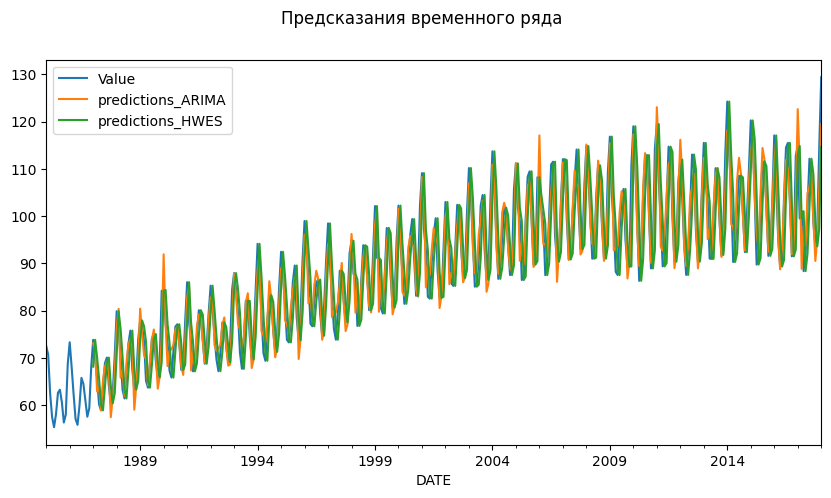

In [18]:
fig, ax = pyplot.subplots(1, 1, sharex='col', sharey='row', figsize=(10,5))
fig.suptitle('Предсказания временного ряда')
dataset.plot(ax=ax, legend=True)
pyplot.show()

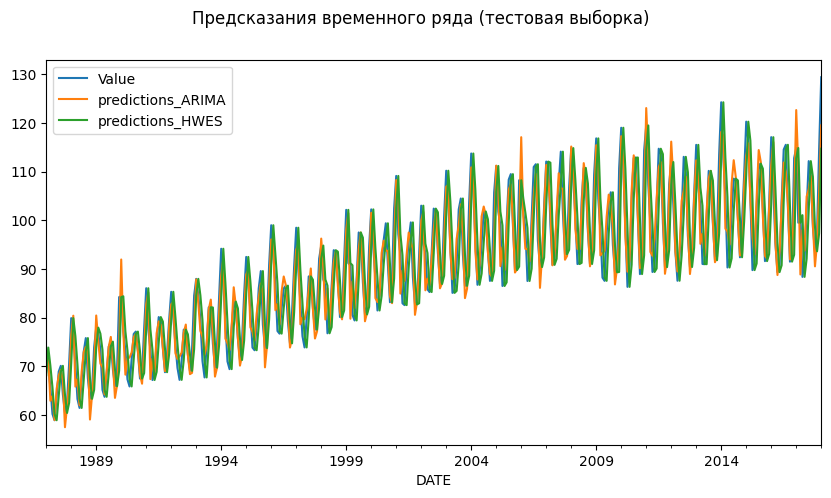

In [19]:
fig, ax = pyplot.subplots(1, 1, sharex='col', sharey='row', figsize=(10,5))
fig.suptitle('Предсказания временного ряда (тестовая выборка)')
dataset[train_size:].plot(ax=ax, legend=True)
pyplot.show()